In [1]:
from simulations.pixel_array import pixelarrayQPC
from optimization.trajectory_optimization import trajectory_func_to_optimize
from optimization.cma2 import optimize_cma
from lossfunctions.staircasiness import staircasiness
from datahandling.datahandling import datahandler
import numpy as np
from functools import partial
from multiprocessing import cpu_count

In [2]:
start=-7
stop=2
steps=100

# Parameters for QPC
disorder=0.3
outer_gates=-13
B_field=0
energy=3

# Parameters for optimization algorithm
# bounds=(-1,1)
# pfactor=0.001

# Initialize loss function
stairs=staircasiness(delta=0.05,last_step=20)

# Set common voltage sweep
common_voltages=np.linspace(start,stop,steps)


# Initialize QPC instance and set parameters
QPC=pixelarrayQPC(plot=False)

QPC.U0=disorder
QPC.energy=energy
QPC.V1=outer_gates
QPC.V11=outer_gates
QPC.phi=B_field

dat=datahandler('fourier_modes',QPC=QPC)

In [3]:
order=2
start_point=np.zeros(shape=(order,8)).ravel()
kwargs={'common_mode':common_voltages,'QPC_instance':QPC,'order':order,'loss_function':stairs.stairLossFunk2,'bounds':(-9,4),'pfactor':0.001,'num_cpus':cpu_count()}
actual_func_to_minimize=partial(trajectory_func_to_optimize,**kwargs)
result=optimize_cma(actual_func_to_minimize,dat,start_point,maxfevals=99999,sigma=0.5,stop_time=100)

data saved to:
/Users/qdev_26/Documents/PhD/kwantrl/kwantrl_data/outcmaes/3/
(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 16 (seed=493281, Thu Jan  6 14:02:10 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 2.239751278663346e+01 1.0e+00 4.63e-01  5e-01  5e-01 2:10.6
termination on timeout=100 (Thu Jan  6 14:04:31 2022)
final/bestever f-value = 2.339838e+01 2.239751e+01
incumbent solution: [-0.1354523  -0.40507769 -0.40924164 -0.08022381  0.51803204  0.04550564
  0.0788406   0.03451685 ...]
std deviations: [0.45736792 0.46575749 0.46746091 0.4614235  0.46086447 0.45963883
 0.4663709  0.4630676  ...]


In [4]:
import json
with open(dat.data_path+f'outcmaes/{result[2]}/datadict.txt','rb') as file:
    results_dict=json.load(file)


In [6]:
losses=[]
xs=[]
voltages=[]
staircases=[]
for key in range(len(results_dict['measurements'])):
    losses.append(results_dict['measurements'][str(key)]['loss'])
    voltages.append(results_dict['measurements'][str(key)]['voltages'])
    staircases.append(results_dict['measurements'][str(key)]['staircase'])
    xs.append(results_dict['measurements'][str(key)]['x'])

[0.2458839647985539, -0.45221917083324714, -1.007017315842555, -0.3126216828132853, 0.7996263033130521, 0.3157165998076804, -0.5611991780989214, 0.524509169748602, 0.4972910273131387, -1.0396647797508223, -0.01688602011998656, -0.4435552864075102, -0.10309099382073067, -0.6931700548619877, 0.2085344612050145, 0.45195691771199287]


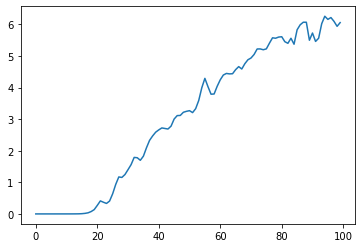

In [7]:
import matplotlib.pyplot as plt
plt.plot(staircases[np.argmin(losses)])
print(xs[np.argmin(losses)])


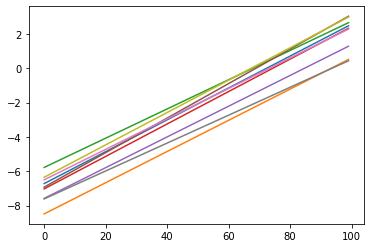

In [ ]:
array_voltages=np.array(voltages[np.argmin(losses)])
plt.figure()
for i in range(9):
    plt.plot(array_voltages[:,i])